## The 0/1 Knapsack Problem
The 0/1 Knapsack Problem states that you have a backpack with a weight limit, and you are in a room full of treasures, each treasure with a value and a weight.
To solve the problem, you must figure out which treasures to pack to maximize the
total value, and at the same time keeping below the backpack's weight limit.

## Rules:
* Every item has a weight and value
* Your knapsack has a weight limit.
* Choose which items you want to bring with you in the knapsack.
* You can either take an item or not, you cannot take half of an item for example


## Goal:
Maximize the total value of the items in the knapsack.

# Importing Stuff

In [685]:
! pip3 install matplotlib

In [686]:
import random
import matplotlib.pyplot as plt

# Problem definition

In [687]:
values = [
    60,102,140,70,250,320,430,150,200,300,500,80,
    220,330,400,90,110,210,310,180,260,350,120,95,
    135,175,205,240,280,315,360,395,440,470,510,55,
    40,30,10,20,10,15,11,12,18,3,555,89,56,145,165,
    185,205,225,245,265,285,305,325,345,365
]
weights = [
    10,20,30,15,25,35,40,10,20,30,50,5,
    15,25,35,8,12,22,32,6,14,28,9,7,
    11,13,16,19,23,27,31,34,38,41,45,5,
    4,3,2,2,1,2,2,3,1,10,7,5,6,8,9,
    11,13,15,17,19,21,23,25,27,29
]
capacity = 500

# GA parameters

In [688]:
num_items = len(values)
POP_SIZE = 80
GENERATIONS = 800
MUTATION_RATE = 0.10
TOURNAMENT_SIZE = 6

# Fitness Funciton

In [689]:
def fitness(individual):
    total_value = 0
    total_weight = 0
    
    for gene, value, weight in zip(individual, values, weights):
        if gene == 1:
            total_value += value
            total_weight += weight
    
    if total_weight > capacity:
        return 0  # penalize invalid solutions
    return total_value

# Initialization

In [690]:
def create_individual():
    return [random.randint(0, 1) for _ in range(num_items)]

def create_population():
    return [create_individual() for _ in range(POP_SIZE)]

# Selection (tournament)

In [691]:
def select_parent(population):
    tournament = random.sample(population, TOURNAMENT_SIZE)
    tournament.sort(key=lambda ind: fitness(ind), reverse=True)
    return tournament[0]

# Crossover (single-point)

In [692]:
def crossover(parent1, parent2):
    point = random.randint(1, num_items - 1)
    child1 = parent1[:point] + parent2[point:]
    child2 = parent2[:point] + parent1[point:]
    return child1, child2

# Mutation

In [693]:
def mutate(individual):
    for i in range(num_items):
        if random.random() < MUTATION_RATE:
            individual[i] = 1 - individual[i]

# Main GA loop

In [694]:
fitness_history = []
def genetic_algorithm():
    population = create_population()

    for generation in range(GENERATIONS):

        # record best fitness this generation
        best = max(population, key=fitness)
        fitness_history.append(fitness(best))

        # create next generation
        new_population = []
        while len(new_population) < POP_SIZE:
            p1 = select_parent(population)
            p2 = select_parent(population)
            c1, c2 = crossover(p1, p2)
            mutate(c1)
            mutate(c2)
            new_population.extend([c1, c2])

        population = new_population

        # print progress
        best = max(population, key=fitness)
        print(f"Gen {generation}: best value = {fitness(best)}")

    return max(population, key=fitness)


# Run GA

In [695]:
best_solution = genetic_algorithm()
best_weight = sum(w for g, w in zip(best_solution, weights) if g == 1)

Gen 0: best value = 6433
Gen 1: best value = 6398
Gen 2: best value = 6437
Gen 3: best value = 6458
Gen 4: best value = 6564
Gen 5: best value = 6842
Gen 6: best value = 6798
Gen 7: best value = 6786
Gen 8: best value = 6691
Gen 9: best value = 6473
Gen 10: best value = 6669
Gen 11: best value = 6633
Gen 12: best value = 6653
Gen 13: best value = 6451
Gen 14: best value = 6589
Gen 15: best value = 6584
Gen 16: best value = 6535
Gen 17: best value = 6712
Gen 18: best value = 6717
Gen 19: best value = 6795
Gen 20: best value = 6657
Gen 21: best value = 6742
Gen 22: best value = 6861
Gen 23: best value = 6723
Gen 24: best value = 6636
Gen 25: best value = 6851
Gen 26: best value = 6539
Gen 27: best value = 6734
Gen 28: best value = 6636
Gen 29: best value = 6791
Gen 30: best value = 6794
Gen 31: best value = 6743
Gen 32: best value = 6621
Gen 33: best value = 6696
Gen 34: best value = 6454
Gen 35: best value = 6591
Gen 36: best value = 6481
Gen 37: best value = 6533
Gen 38: best value = 6

# View Best Solution

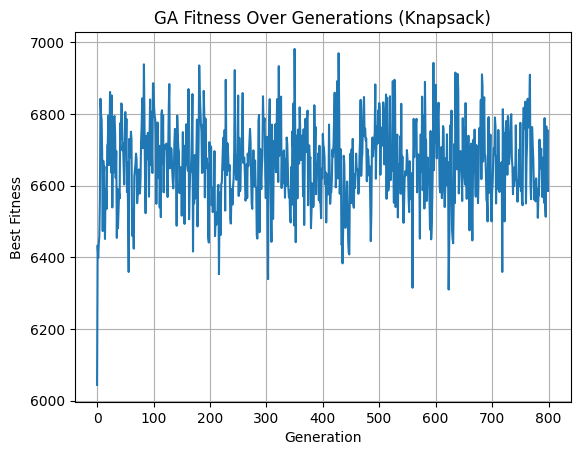

In [696]:
plt.plot(fitness_history)
plt.xlabel("Generation")
plt.ylabel("Best Fitness")
plt.title("GA Fitness Over Generations (Knapsack)")
plt.grid(True)
plt.show()

In [697]:
print("\nBest solution:", best_solution)
print("Best value:", fitness(best_solution))
print("Best weight:", best_weight)


Best solution: [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1]
Best value: 6548
Best weight: 495


# Now it's time for Elitism in Knapsack Problem

# Fitness Function

In [698]:
def fitness(individual):
    total_value = 0
    total_weight = 0
    for gene, v, w in zip(individual, values, weights):
        if gene == 1:
            total_value += v
            total_weight += w

    if total_weight > capacity:
        return 0  # invalid solutions are penalized

    return total_value


# Initialization

In [699]:
def create_individual():
    return [random.randint(0, 1) for _ in range(num_items)]

def create_population():
    return [create_individual() for _ in range(POP_SIZE)]


# Tournament Selection

In [700]:

def select_parent(population):
    competitors = random.sample(population, TOURNAMENT_SIZE)
    return max(competitors, key=fitness)

# Crossover (single-point)

In [701]:
def crossover(p1, p2):
    point = random.randint(1, num_items - 1)
    return p1[:point] + p2[point:], p2[:point] + p1[point:]


# Mutation (bit flip)

In [702]:
def mutate(individual):
    for i in range(num_items):
        if random.random() < MUTATION_RATE:
            individual[i] = 1 - individual[i]

# GA with elitism

In [703]:
def genetic_algorithm():
    population = create_population()

    for gen in range(GENERATIONS):

        # --- ELITISM: keep best individual ---
        sorted_pop = sorted(population, key=fitness, reverse=True)
        new_population = sorted_pop[:ELITISM]

        # --- Generate rest of population ---
        while len(new_population) < POP_SIZE:
            parent1 = select_parent(population)
            parent2 = select_parent(population)
            child1, child2 = crossover(parent1, parent2)
            mutate(child1)
            mutate(child2)
            new_population.extend([child1, child2])

        population = new_population

        best = sorted_pop[0]
        print(f"Gen {gen}: best value = {fitness(best)}")

    return max(population, key=fitness)

# Run GA

In [704]:
best_solution = genetic_algorithm()

best_value = fitness(best_solution)
best_weight = sum(w for g, w in zip(best_solution, weights) if g == 1)

print("\nBest solution:", best_solution)
print("Best value:", best_value)
print("Best weight:", best_weight)

Gen 0: best value = 6262
Gen 1: best value = 6525
Gen 2: best value = 6525
Gen 3: best value = 6629
Gen 4: best value = 6629
Gen 5: best value = 6766
Gen 6: best value = 6766
Gen 7: best value = 6766
Gen 8: best value = 6855
Gen 9: best value = 6871
Gen 10: best value = 6871
Gen 11: best value = 6871
Gen 12: best value = 6871
Gen 13: best value = 6871
Gen 14: best value = 6871
Gen 15: best value = 6871
Gen 16: best value = 6871
Gen 17: best value = 6871
Gen 18: best value = 6936
Gen 19: best value = 6936
Gen 20: best value = 6936
Gen 21: best value = 6936
Gen 22: best value = 6936
Gen 23: best value = 6936
Gen 24: best value = 6936
Gen 25: best value = 7026
Gen 26: best value = 7026
Gen 27: best value = 7026
Gen 28: best value = 7026
Gen 29: best value = 7026
Gen 30: best value = 7026
Gen 31: best value = 7026
Gen 32: best value = 7026
Gen 33: best value = 7026
Gen 34: best value = 7026
Gen 35: best value = 7026
Gen 36: best value = 7026
Gen 37: best value = 7026
Gen 38: best value = 7

# Now We Improve The Genetic Algorithm with Repair Operator

# Repair Operator

In [705]:
def repair(individual):
    total_weight = sum(w for g, w in zip(individual, weights) if g == 1)

    if total_weight <= capacity:
        return individual 
    # compute value/weight ratio for each item
    ratio = [(i, values[i] / weights[i]) for i in range(num_items)]

    # sort items by worst ratio (low value/weight first)
    ratio.sort(key=lambda x: x[1])

    # remove items starting with worst ratios until valid
    repaired = individual[:]
    for idx, r in ratio:
        if sum(w for g, w in zip(repaired, weights) if g == 1) <= capacity:
            break
        if repaired[idx] == 1:
            repaired[idx] = 0

    return repaired

# Fitness function (never invalid now!)

In [706]:
def fitness(ind):
    total_value = 0
    total_weight = 0
    for g, v, w in zip(ind, values, weights):
        if g == 1:
            total_value += v
            total_weight += w
    if total_weight > capacity:
        return 0
    return total_value

# GA building blocks

In [707]:
def create_individual():
    return [random.randint(0, 1) for _ in range(num_items)]

def create_population():
    pop = [create_individual() for _ in range(POP_SIZE)]
    # repair all individuals
    return [repair(ind) for ind in pop]


def select_parent(population):
    competitors = random.sample(population, TOURNAMENT_SIZE)
    return max(competitors, key=fitness)


def crossover(p1, p2):
    point = random.randint(1, num_items - 1)
    c1 = p1[:point] + p2[point:]
    c2 = p2[:point] + p1[point:]
    return c1, c2


def mutate(ind):
    for i in range(num_items):
        if random.random() < MUTATION_RATE:
            ind[i] = 1 - ind[i]

# Genetic Algorithm with REPAIR + ELITISM

In [708]:
def genetic_algorithm():
    population = create_population()
    fitness_history = []

    for gen in range(GENERATIONS):

        population = sorted(population, key=fitness, reverse=True)

        # record best fitness
        fitness_history.append(fitness(population[0]))

        new_population = population[:ELITISM]  # elitism

        # generate remaining individuals
        while len(new_population) < POP_SIZE:
            p1 = select_parent(population)
            p2 = select_parent(population)
            c1, c2 = crossover(p1, p2)
            mutate(c1)
            mutate(c2)

            # repair before adding to population
            new_population.append(repair(c1))
            if len(new_population) < POP_SIZE:
                new_population.append(repair(c2))

        population = new_population

    return population[0], fitness_history

# Run GA

In [709]:
best, history = genetic_algorithm()

best_value = fitness(best)
best_weight = sum(w for g, w in zip(best, weights) if g == 1)

print("Best solution found:", best)
print("Total value:", best_value)
print("Total weight:", best_weight)

Best solution found: [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Total value: 7342
Total weight: 500


# Plot fitness curve

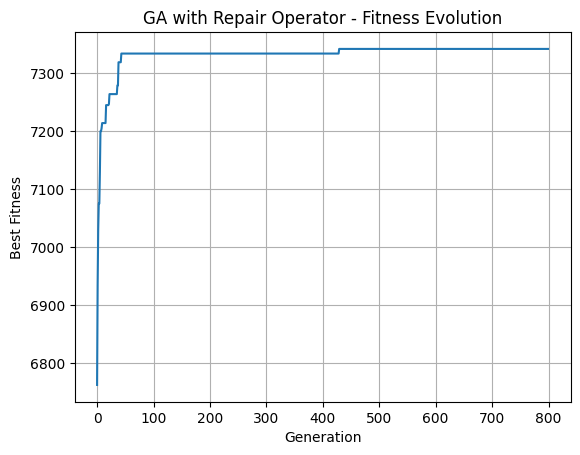

In [710]:
plt.plot(history)
plt.xlabel("Generation")
plt.ylabel("Best Fitness")
plt.title("GA with Repair Operator - Fitness Evolution")
plt.grid(True)
plt.show()

# Comparison between the three methods: Generic GA, GA + Elitism, GA + Elitism + Repair Function

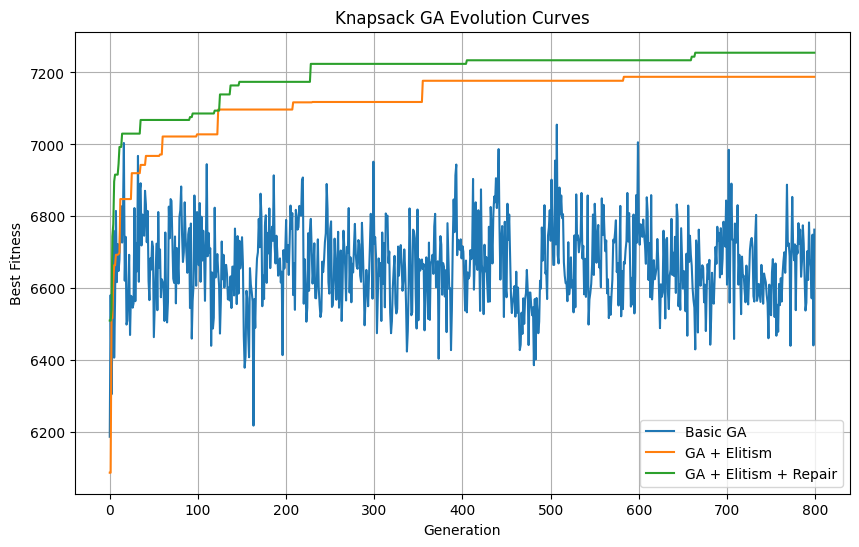

In [711]:
def fitness(ind):
    total_value = sum(v for v, g in zip(values, ind) if g == 1)
    total_weight = sum(w for w, g in zip(weights, ind) if g == 1)
    return total_value if total_weight <= capacity else 0

def repair(ind):
    while sum(w for w, g in zip(weights, ind) if g == 1) > capacity:
        ones = [i for i, g in enumerate(ind) if g == 1]
        if not ones:
            break
        idx = random.choice(ones)
        ind[idx] = 0
    return ind

def mutate(ind):
    for i in range(num_items):
        if random.random() < MUTATION_RATE:
            ind[i] = 1 - ind[i]
    return ind

def tournament_selection(pop):
    competitors = random.sample(pop, TOURNAMENT_SIZE)
    return max(competitors, key=fitness)

def crossover(p1, p2):
    point = random.randint(1, num_items - 2)
    return p1[:point] + p2[point:], p2[:point] + p1[point:]

def run_ga(elitism=False, repaired=False):
    pop = [[random.randint(0, 1) for _ in range(num_items)] for _ in range(POP_SIZE)]
    best_curve = []

    for gen in range(GENERATIONS):

        pop_sorted = sorted(pop, key=fitness, reverse=True)
        best_curve.append(fitness(pop_sorted[0]))

        new_pop = []

        if elitism:
            new_pop.extend(pop_sorted[:ELITISM])

        while len(new_pop) < POP_SIZE:
            p1 = tournament_selection(pop)
            p2 = tournament_selection(pop)

            c1, c2 = crossover(p1, p2)
            c1 = mutate(c1)
            c2 = mutate(c2)

            if repaired:
                c1 = repair(c1)
                c2 = repair(c2)

            new_pop.extend([c1, c2])

        pop = new_pop

    return best_curve

basic_curve     = run_ga(elitism=False, repaired=False)
elitism_curve   = run_ga(elitism=True, repaired=False)
repaired_curve  = run_ga(elitism=True, repaired=True)


plt.figure(figsize=(10, 6))
plt.plot(basic_curve, label="Basic GA")
plt.plot(elitism_curve, label="GA + Elitism")
plt.plot(repaired_curve, label="GA + Elitism + Repair")
plt.xlabel("Generation")
plt.ylabel("Best Fitness")
plt.title("Knapsack GA Evolution Curves")
plt.legend()
plt.grid(True)
plt.show()

# Conclusion

The experimental comparison of the three genetic algorithm configurations—Basic GA, GA with Elitism, and GA with Elitism plus a Repair Function demonstrates the significant influence of selection pressure and constraint-handling on convergence quality in the 0/1 Knapsack problem.

The **Basic GA** exhibited highly unstable behavior throughout all generations. Its best-fitness curve oscillated widely without any long-term improvement trend, indicating that the algorithm failed to retain valuable solutions over time. Because the basic configuration replaces the entire population at every generation without preserving high-fitness individuals, potentially good solutions were repeatedly lost. Combined with the problem’s hard constraint (capacity limit), random crossover and mutation frequently produced overweight or low-value chromosomes, resulting in persistent stagnation. This behavior reflects the absence of explicit exploitation mechanisms and insufficient selective pressure.

Introducing **elitism** substantially improved performance. By preserving at least one of the highest-fitness individuals each generation, the algorithm established a stable upward trajectory and avoided the regression typical of the Basic GA. The elitist curve converged rapidly during the early generations and continued to make incremental improvements before stabilizing. This behavior is consistent with the theoretical expectation that elitism increases exploitation and prevents the loss of globally relevant information in the gene pool. However, occasional plateaus emerged, which can be attributed to the algorithm becoming trapped in locally optimal regions of the search space, especially when newly generated offspring often violated the knapsack’s capacity constraint.

The best performance was achieved by the configuration combining **Elitism with a Repair Function**, where infeasible (overweight) chromosomes were systematically corrected before evaluating fitness. This approach enabled the algorithm to explore a larger portion of the solution space while still ensuring that all evaluated individuals contributed meaningfully to the evolutionary process. The repair mechanism reduced wasted evaluations and improved the survival probability of partially promising solutions that simply exceeded the capacity by a small margin. The fitness curve for this configuration not only rose faster than the elitist-only variant in the early phase but also achieved the highest final fitness value among the three methods. The modest but consistent improvements over elitism alone demonstrate that proper constraint-handling is essential for combinatorial optimization tasks such as knapsack.

Overall, the comparison highlights three key findings:

1. **Elitism is essential** for maintaining evolutionary progress and avoiding oscillatory or stagnant behavior.
2. **Constraint-handling methods**, such as repair functions, significantly enhance GA performance by ensuring that the evaluation focuses on valid and potentially high-quality solutions.
3. **The combination of elitism and repair strategies yields the most stable and highest-quality convergence**, demonstrating a balanced interplay between exploration of new solutions and exploitation of already promising individuals.

This experiment confirms theoretical expectations in evolutionary computation: effective preservation of elite individuals and robust handling of problem constraints are critical factors for achieving strong, stable convergence in genetic algorithms applied to constrained combinatorial optimization problems like the knapsack.
